In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#import data file

health_data = pd.read_csv('healthcare-dataset-stroke-data 2.csv')

In [3]:
health_data.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [4]:
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#missing values by column 

missing = pd.concat([health_data.isnull().sum(), 100*health_data.isnull().mean()],axis=1)
missing.columns=['count','%']

missing.sort_values(['count'],ascending=False)

,count,%
bmi,201,3.933464
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


Most missing numerical values in BMI column -> 3.93% 

In [6]:
#checking categorical values 

health_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
health_data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [8]:
health_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
health_data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [10]:
health_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
(1544/(1892+1544+885+789))*100

30.21526418786693

Few Values missing from categorical values: 
* 1 "Other" value in gender column
* smoking status column has 1544 'Unknown' values (30.22%)

thoughts: 
* could potentially need to get rid of the unknown values depending on their weight 
* Stroke risk factors rely on gender -- could potentially need to get rid of the "other" value. 


In [12]:
# Want to check data to see distribution of men vs women that have strokes 

Female_stroke=health_data[health_data['gender'] == 'Female']['stroke'].sum()
Male_stroke = health_data[health_data['gender'] =='Male']['stroke'].sum()

print('Number of Females that had strokes:', Female_stroke)
print('Numer of Males that had strokes:', Male_stroke)

Number of Females that had strokes: 141
Numer of Males that had strokes: 108


There are 33 more Females that had strokes than Men -- not concluding that men are less likely to have strokes from this since the population sizes are different to begin with 

In [13]:
#Average values by gender 

avg_by_gender = health_data.groupby('gender')[['age','avg_glucose_level','bmi']].mean()
avg_by_gender 

,age,avg_glucose_level,bmi
gender,,,
Female,43.757395,104.057809,29.065758
Male,42.483385,109.088520,28.647936
Other,26.000000,143.330000,22.400000


In [14]:
health_data[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


Suspicious values: Age min of 0.08? , bmi min of 10.3 and max of 97.6


In [15]:
health_data.loc[health_data['bmi']== 97.6]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


In [16]:
health_data.loc[health_data['bmi']== 10.3]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,38043,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0


BMI value is 97.6 -> seems high but not totally impossible, also hypoglycemia and hypertension could be additional indicators of obesity. 

In [17]:
health_data.loc[health_data['age']==0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


potential for perinatal or neonatal stroke patients within dataset 

In [18]:
health_data.loc[(health_data['age']<15) & (health_data['stroke'] ==1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


data shows 2 'Children' who had strokes 

In [19]:
#Distribution of age by gender 

health_age = pd.melt(health_data[['gender','age']],
                        id_vars = 'gender',
                        value_vars= 'age'
                        )
health_age.head()

,gender,variable,value
0,Male,age,67.0
1,Female,age,61.0
2,Male,age,80.0
3,Female,age,49.0
4,Female,age,79.0


In [20]:
health_glucose = pd.melt(health_data[['gender','avg_glucose_level']],
                        id_vars = 'gender',
                        value_vars= 'glucose_level'
                        )
health_glucose.head()

,gender,variable,value
0,Male,avg_glucose_level,228.69
1,Female,avg_glucose_level,202.21
2,Male,avg_glucose_level,105.92
3,Female,avg_glucose_level,171.23
4,Female,avg_glucose_level,174.12


In [21]:
health_bmi = pd.melt(health_data[['gender','bmi']],
                        id_vars = 'gender',
                        value_vars= 'bmi'
                        )
health_bmi.head()

,gender,variable,value
0,Male,bmi,36.6
1,Female,bmi,NaN
2,Male,bmi,32.5
3,Female,bmi,34.4
4,Female,bmi,24.0


Text(0.5, 0, 'Gender')

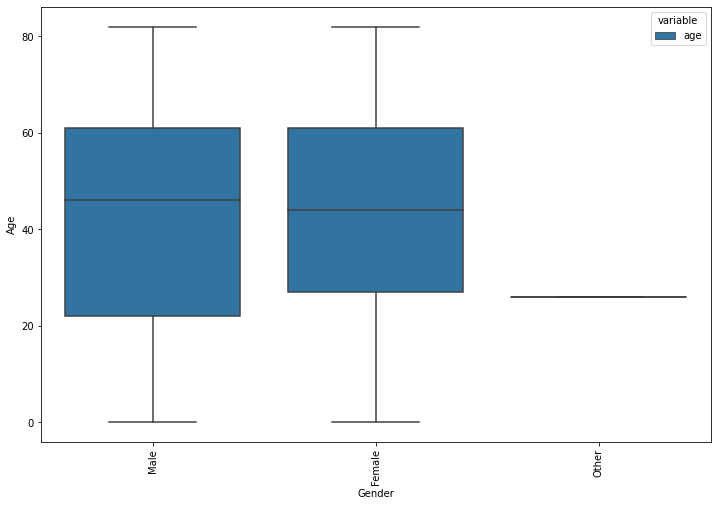

In [22]:
plt.subplots(figsize=(12,8))
sns.boxplot(x='gender', y='value', hue='variable', data=health_age)
plt.xticks(rotation = 'vertical')
plt.ylabel('Age')
plt.xlabel('Gender')

Text(0.5, 0, 'Gender')

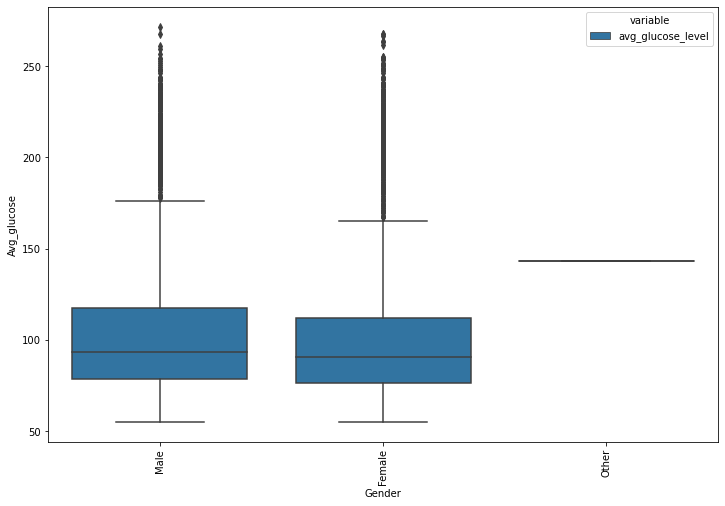

In [23]:
plt.subplots(figsize=(12,8))
sns.boxplot(x='gender', y='value', hue='variable', data=health_glucose)
plt.xticks(rotation = 'vertical')
plt.ylabel('Avg_glucose')
plt.xlabel('Gender')

Text(0.5, 0, 'Gender')

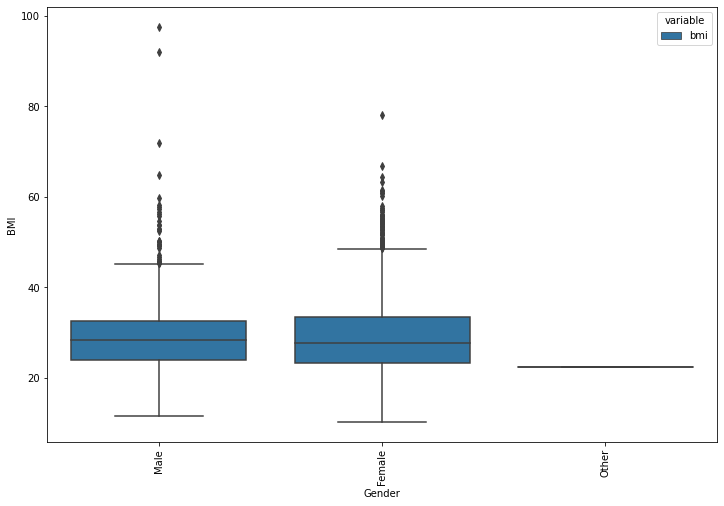

In [24]:
plt.subplots(figsize=(12,8))
sns.boxplot(x='gender', y='value', hue='variable', data=health_bmi)
plt.xticks(rotation = 'vertical')
plt.ylabel('BMI')
plt.xlabel('Gender')

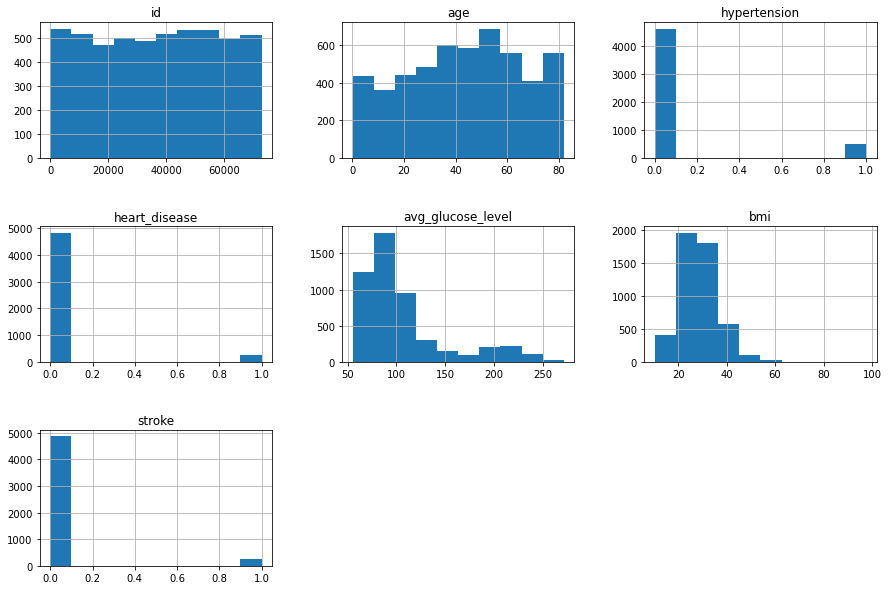

In [25]:
health_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Values seem fine in terms of validity -- the data does show that most patients do not have hypertension, heart disease, or had a stroke. 

In [26]:
health_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [27]:
health_data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [28]:
health_data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [29]:
health_data.shape

(5110, 12)

Data was already clean -> have not changed data so will not need to save as new csv file. 

A majority of the missing values reside in the BMI section of the dataset -- this could potentially be an issue since BMI can play a major factor in stroke risk. Overall, only 3.93% of BMI data is missing. A bigger issue could be that over 30% of patients are missing a smoking history status. No data points have been dropped yet. 